# Modelo de Clasificación K-means

##Fundamentos de la técnica
 Es un algoritmo de agrupamiento el cual divide un conjunto de datos en grupos o clusters.

 Para utilizar el algoritmo k-means primero tenemos que especificar el número de grupos que tendremos (en este caso nuestras clases)si tomamos nuestro dataframe que cuenta con 3 frutas nuestra k seria 3.

#Modelo matemático

##1. Representación de los datos

Tenemos un conjunto de puntos (frutas, personas, objetos, etc.):

$$
X = \{x_1, x_2, x_3, ..., x_n\}
$$

Cada punto $( x_i )$ tiene varias características (por ejemplo, peso y tamaño).

El objetivo de K-Means es dividir estos puntos en **K grupos (clusters)**:

$$
C_1, C_2, ..., C_K
$$

donde cada grupo $( C_k )$ tiene su propio **centro o centroide**.


##2. Inicialización de centroides

Primero, se eligen aleatoriamente **K puntos** como **centroides iniciales**.  
Un **centroide** representa el **promedio** de los puntos en un grupo.

$$
\mu_1, \mu_2, ..., \mu_K
$$

## 3. Asignación de puntos al centroide más cercano

Cada punto $( x_i )$ se asigna al centroide más cercano usando una medida de **distancia**,  
normalmente la **distancia euclidiana**:

$$
\text{Asignar } x_i \text{ al cluster } j \text{ tal que } d(x_i, \mu_j) \text{ sea mínima.}
$$

En palabras simples:
Cada punto pertenece al grupo cuyo centro esté más cerca.


##4. Recalcular los centroides

Una vez que todos los puntos están agrupados,  
se **recalcula el centroide** de cada grupo como el **promedio** de todos los puntos en ese grupo:

$$
\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
$$

Así, los centroides se mueven hacia el “centro real” de cada grupo.

##5. Repetir hasta que no cambien

Se repiten los pasos **3** y **4** hasta que los puntos **ya no cambien de grupo**,  
es decir, los **centroides se estabilizan**.


##6. Función objetivo (lo que K-Means intenta minimizar)

K-Means busca que los puntos estén lo más **cerca posible de su centroide**.  
Matemáticamente, **minimiza la suma de los cuadrados de las distancias** entre cada punto y su centroide:

$$
J = \sum_{j=1}^{K} \sum_{x_i \in C_j} \| x_i - \mu_j \|^2
$$

In [69]:
#IMPORTACION DE LIBRERIAS Y DATASET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv("/content/fruit_classification.csv")

df = df.drop(columns=["taste"], errors='ignore')

df.head()


,size (cm),shape,weight (g),avg_price (₹),color,fruit_name
0,10.2,long,131.5,37.8,yellow,banana
1,5.4,round,136.0,80.2,red,apple
2,9.8,long,118.1,37.1,yellow,banana
3,9.0,long,126.0,37.6,yellow,banana
4,9.3,long,117.3,36.5,yellow,banana


In [70]:
#NORMALIZACION DE VARIABLES CON Z-SCORE
shape = LabelEncoder()
color = LabelEncoder()

df['shape'] = shape.fit_transform(df['shape'])
df['color'] = color.fit_transform(df['color'])

scaler = StandardScaler()

cols_to_scale = ["size (cm)", "weight (g)", "avg_price (₹)","shape","color"]

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
#df = df.drop(columns=["fruit_name"], errors='ignore')

df.head(10)



,size (cm),shape,weight (g),avg_price (₹),color,fruit_name
0,1.288505,-1.191928,0.582248,-1.303795,1.361099,banana
1,-0.377598,1.208692,0.664495,1.200841,-0.734701,apple
2,1.149663,-1.191928,0.337336,-1.345145,1.361099,banana
3,0.871979,-1.191928,0.481724,-1.315609,1.361099,banana
4,0.976111,-1.191928,0.322714,-1.380588,1.361099,banana
5,-0.099914,1.208692,0.876509,1.389870,-0.734701,apple
6,-0.204045,1.208692,0.918546,0.822782,-0.734701,apple
7,-1.175938,0.008382,-1.461128,0.285231,-0.734701,strawberry
8,-0.238756,1.208692,0.701049,1.549363,-0.734701,apple
9,1.357926,-1.191928,0.386684,-1.073416,1.361099,banana


##Feature Engineering

In [71]:
##VARIABLES QUE SE UTILIZARAN PARA EL CALCULO DE CENTROIDES MAS CERCANO

features = ["size (cm)", "weight (g)", "avg_price (₹)", "shape", "color"]

X = df[features]
X.head()


,size (cm),weight (g),avg_price (₹),shape,color
0,1.288505,0.582248,-1.303795,-1.191928,1.361099
1,-0.377598,0.664495,1.200841,1.208692,-0.734701
2,1.149663,0.337336,-1.345145,-1.191928,1.361099
3,0.871979,0.481724,-1.315609,-1.191928,1.361099
4,0.976111,0.322714,-1.380588,-1.191928,1.361099


=== Etiquetas de cluster asignadas ===
cluster
0    502
1    492
2    438
Name: count, dtype: int64


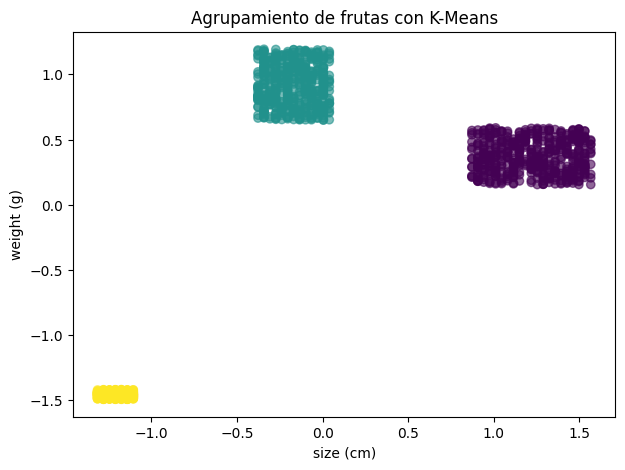

In [76]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(X)

df["cluster"] = kmeans.labels_

print("=== Etiquetas de cluster asignadas ===")
print(df["cluster"].value_counts())

plt.figure(figsize=(7,5))
plt.scatter(df["size (cm)"], df["weight (g)"], c=df["cluster"], cmap="viridis", alpha=0.6)
plt.title("Agrupamiento de frutas con K-Means")
plt.xlabel("size (cm)")
plt.ylabel("weight (g)")
plt.show()


In [77]:
#PONIENDO A PRUEBA EL ALGORITMO
def predict_cluster(size, weight, avg_price, shape, color):
    data = np.array([[size, weight, avg_price, shape, color]])
    cluster = kmeans.predict(data)
    print(f"El patrón pertenece al cluster: {cluster[0]}")
    return cluster[0]

predict_cluster(0.5, -0.2, 1.1, 0.0, -1.2)


El patrón pertenece al cluster: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


np.int32(1)

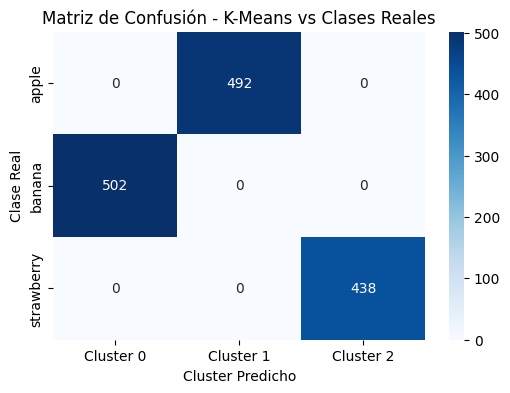

Precisión (Accuracy): 0.306


In [78]:
#METRICAS
encoder = LabelEncoder()
y_true_encoded = encoder.fit_transform(y_true)

cm = confusion_matrix(y_true_encoded, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"Cluster {i}" for i in range(len(set(y_pred)))],
            yticklabels=encoder.classes_)
plt.title("Matriz de Confusión - K-Means vs Clases Reales")
plt.xlabel("Cluster Predicho")
plt.ylabel("Clase Real")
plt.show()

acc = accuracy_score(y_true_encoded, y_pred)
print(f"Precisión (Accuracy): {acc:.3f}")



##Bibliografías

https://www.iebschool.com/hub/algoritmo-k-means-que-es-y-como-funciona-big-data/

https://www.ultralytics.com/es/glossary/k-means-clustering